# Advanced Python Bootcamp


## Review
What did we learn in the first python bootcamp? If you want to go check it out in depth, it is available on my github here https://github.com/cagostino/python-bootcamp/blob/master/beginner/pybootcamp.ipynb . If not, we'll go over the basics here. We learned how to use python as a calculator and all of the mathematical symbols
$$ +,/,*,-,//,%$$

We also learned how to assign variables and about different data types. The main datatypes we used then and will use today were integers, floats, strings, lists, tuples, Booleans. We also learned about the methods and properties that come with each of these data types. We learned about array indexing, how to import libraries, and how to write our own functions. We learned how to loop and how to control the flow of the program with conditionals. 
## Overview
Today, we're going to have a brief overview of dictionaries then will learn more about classes and object oriented programming. Using this, we will develop a simulation of the solar system.
We will then learn how to parallelize our code to take advantage of the ability of our computers to process multiple calculations at the same time. We will then learn about Markov methods and Markov Chain Monte Carlo (MCMC) techniques and use a model to fit Earth's ice core temperatures as a function of time. 
After that, we will look at how to scrape webpges in Python and then finally how to make graphical user interfaces.

### Dictionaries
In python, dictionaries are series of key-values pairs. They are  useful for storing values with specific key names, usually with text information These are enclosed in braces.  
For example, if you were writing a program that turned your keyboard into a virtual piano and you wanted to have keys corresponding to different piano notes you could use a dictionary.

In [1]:
#in this dictionary, the keyboard keys are the keys
#and the piano notes are the values.
piano_keys = {'a':'c4','s':'d4','d':'e4','f':'f4','g':'g4',
                'h':'a4','j':'b4', 'k':'c5','w':'c#','e':'d#',
                't':'f#','y':'g#','u':'a#'}
b4 = piano_keys['j']
print(b4)
print(piano_keys)
print(piano_keys.keys())
print(piano_keys.values())
# we can add new keys to the dictionary  in the below fashion:
piano_keys['v']='none'

print(piano_keys)
print(piano_keys.keys())
print(piano_keys.values())

b4
{'h': 'a4', 's': 'd4', 'k': 'c5', 'j': 'b4', 'a': 'c4', 't': 'f#', 'f': 'f4', 'g': 'g4', 'u': 'a#', 'd': 'e4', 'y': 'g#', 'e': 'd#', 'w': 'c#'}
dict_keys(['h', 's', 'k', 'j', 'a', 't', 'f', 'g', 'u', 'd', 'y', 'e', 'w'])
dict_values(['a4', 'd4', 'c5', 'b4', 'c4', 'f#', 'f4', 'g4', 'a#', 'e4', 'g#', 'd#', 'c#'])
{'h': 'a4', 's': 'd4', 'k': 'c5', 'j': 'b4', 'a': 'c4', 't': 'f#', 'f': 'f4', 'g': 'g4', 'u': 'a#', 'd': 'e4', 'y': 'g#', 'e': 'd#', 'w': 'c#', 'v': 'none'}
dict_keys(['h', 's', 'k', 'j', 'a', 't', 'f', 'g', 'u', 'd', 'y', 'e', 'w', 'v'])
dict_values(['a4', 'd4', 'c5', 'b4', 'c4', 'f#', 'f4', 'g4', 'a#', 'e4', 'g#', 'd#', 'c#', 'none'])


### Classes
Python is an object oriented programming language. The different datatypes we have already encountered were different classes in python. As we could develop our own variables and functions, we too can develop our own classes. In these classes there will be attributes (class specific variables) and methods (class specific functions).
#### Attributes
In python there are class attributes and instance attributes available through dot notation. Class attributes will be the same for all instances of the class regardless of the parameters of the instance. Instance variables will likely be different from instance to instance and are initialized with the \__init\__ function.
##### Methods
Methods are functions available through dot notation. We used many of these when working with strings, lists, and numpy arrays like  str.upper() and list.append().

##### Some More Resources 
Chapters 12-14 of this book
http://www.greenteapress.com/thinkpython/thinkCSpy.pdf

### Cash register example
Here we set up a cash register to show how classes are initialized with \__init\__ and how to set up instance attributes, methods, and the importance of self. 

In [21]:
salad_price = 3.50
hotdogprice = 2.50
class Register(object):
    
    def __init__(self, balance, npurchases=0, nsalads=0, nhotdogs=0):
        self.balance =  balance
        self.npurchases = npurchases
        self.nsalads=nsalads
        self.nhotdogs= nhotdogs
    def makesale(self, itemnum,num=1):
        items = {0:[self.nsalads,salad_price],
              1:[self.nhotdogs, hotdogprice]}
        self.npurchases +=1
        if type(itemnum) != list:
            self.balance += num*items[itemnum][1]
            items[itemnum][0]+= num
            print(self.balance)
        else:
            if num == 1:  
                num=[1,1]
            self.balance += num[0]*items[itemnum[0]][1]
            self.balance += num[1]*items[itemnum[1]][1]
            print(items[itemnum[0]])
            items[itemnum[0]][0]+=num[0]
            items[itemnum[1]][0]+=num[1]
    def refund(self, amt):
        self.balance -=amt
class Automatic_Register(Register):
    def bankruptcy(self):
        self.balance =0
    
#reg1 =  Automatic_Register(7)
#reg = Register(5)
#Register.refund(reg,10)
reg.makesale([0,1],[2,3])
print(reg.balance)
print(reg1.balance)

#print(dir(reg))
#print(dir(reg1))

[0, 3.5]
63.0
7


### Exercise 1: Simulating the solar system



The gravitational force between two bodies m_1 an m_2 separated by a distance r is defined as 
$$F_{g} = G \frac{m_1 m_2}{r^2} $$
where G is the gravitational constant, 6.67e-11. In addition, we know from Newton's second law that
$$F=ma$$
and that if acceleration is constant (which we can assume it is over short time intervals), the velocity of the object is then 
$$v=at$$
where t is our timestep and a is determined from our force equation.
We can find our position as a function of time in this linear regime as being
$$x=vt$$
A nontrivial fact about the graviational force is that it obeys the law of superpostion, meaning that the total force on any object is just the sum of all of the individual forces on that object.

To simulate the effects of gravity on multiple bodies, we can use classes! We want to develop a class of generalized bodies which obey gravity. We want to make a class with all of the necessary parameters. For this project, we are going to work in two dimensions, though it is quite easy to generalize to a third dimension.
##### Classes
1. To do this, create a body class which requires a mass, position (x and y) and velocity (x and y) as its initialization parameters. 
2. In addition to these initial parameters in your \__init\__ function, set up two empty arrays for x position and y position so that as the simulation progresses we can keep track of how the body moved.
3. Create a gravity method which finds the force between the two objects. Then find a way to convert that total force into its x and y components and return those values.

##### Simulating Gravity
1. Begin by defining a simulate function which takes in a list of bodies.
2. Define your timestep (in seconds). In my implementation I use one day but test some values out. You will also want to set a number of steps. A good number would be on the order of a hundred days so you can see some sort of larger structure to the orbits.
3. Create a for or while loop which will loop the number of steps you want.
4. In this while/for loop, Create two empty arrays, one for force in the x direction and one for force in the y direction.
5. Then, inside of the loop, create another for loop which loops over the different bodies. Inside of that loop, make two variables, totalfx,totalfy, and set them equal to zero. We will be adding to these when we measure gravity.
6. In that loop, create another for loop that loops over the different bodies. Inside of this loop, check to make sure that the two bodies are not the same body. If they are indeed different, use the gravity method to find the force between the two bodies. Add the values from the gravity function to the totalfx and totalfy variables from the previous step.
7. Outside of that loop, append the totalfx and totalfy to the arrays defined in step 4.
8. Now we have all of the forces on all of the bodies. In the while/for loop, create another for loop which we can use to extract the information from the force and bodies array.
9. In this for loop, use the information from the force array and the mass of the body to determine the accelerations in the x and y directions. Then use that and the timestep to change the velocity.
10. With the new velocity, adjust the new x and y positions and these values to our empty position arrays that we defined in the body method.
11. Now we’re done with all of actual computation! Now we simply need to show our results. Use another for loop (outside of the while/for loop) to plot the position arrays we set up before. 


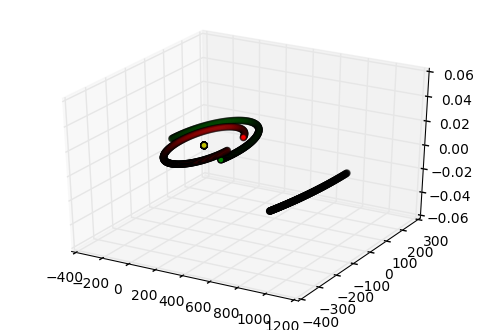

In [21]:
import numpy as np
import matplotlib.pyplot as plt

AU=(149.6e6 *1000)
scale=250/AU
G = 6.67428e-11

class body: 
    def __init__(x,x,x,x,x=0,x=0):
        #write your code here and change the arguments above
    def gravity(self,other):
        #write your code here
        
def simulate(bodies):
    #write your simulation code here!
def runstuff():
    #initialize the simulation here

## Parallel Computing
Paralell compuing is a type of computing that allows many calculations to be carried out simultaneously. Large computational tasks are broken down into smaller subtasks and are carried out on different cores.
Parallel computing is useful in creating large simulations with high resolution and many parts. It is also useful in carrying out lots of simple calculations like those performed in data analysis.


In [23]:
import multiprocessing
import os
import numpy as np
from multiprocessing import Process
import matplotlib.pyplot as plt
from multiprocessing import Pool
f= open('coefficients.txt','w')
f.write('a'+'\t'+'b'+'\t'+'c'+'\n')
f.close()
def quadfits(x,y):
    """
    A function that fits quadratic polynomials to data
    """
    f= open('coefficients.txt','a')
    
    a0,b0,c0 = np.polyfit(x,y,2)
    f.write(str(a0) + '\t'+str(b0)+'\t'+str(c0) +'\n')
    f.close()

    proc = os.getpid()
    print('Quad coefficient: {0}, Linear Coefficient {1}, Y Intercept: {2} by process id: {3}'.format(
        a0,b0,c0,proc))
    return a0,b0,c0
### set up some fake data
x = np.linspace(0,10,3000)
y_arrays= np.zeros( (5000,np.size(x)))

for i in range(50):
    np.random.seed(i)
    y_arrays[i,:] = x**2-2*x+4  + np.random.rand(3000)
#plt.plot(x,y_arrays[i,:])
#plt.show()
procs = []
   
for i in range(50):
    y = y_arrays[i,:]
    proc = Process(target=quadfits, args=(x,y))
    procs.append(proc)
    proc.start()
for proc in procs:
    proc.join()
a,b,c = np.transpose(np.loadtxt('coefficients.txt',skiprows=1, delimiter='\t'))
print('mean a: ', np.mean(a), 'mean b: ', np.mean(b), 'mean c: ', np.mean(c) )

Quad coefficient: 1.0003679220716488, Linear Coefficient -2.001131677925014, Y Intercept: 4.487862652520475 by process id: 10719
Quad coefficient: 0.9990280522903627, Linear Coefficient -1.9924283895826194, Y Intercept: 4.494668379163138 by process id: 10718
Quad coefficient: 0.9994561290324523, Linear Coefficient -1.9966102237576444, Y Intercept: 4.497698812821361 by process id: 10720
Quad coefficient: 1.0005497091699773, Linear Coefficient -2.000552182762538, Y Intercept: 4.485297683656502 by process id: 10730
Quad coefficient: 0.9998053083208804, Linear Coefficient -1.9979101698788635, Y Intercept: 4.502500551107854 by process id: 10728
Quad coefficient: 0.9993808306454735, Linear Coefficient -1.9926170557865523, Y Intercept: 4.48796758614216 by process id: 10717
Quad coefficient: 1.0002591086728767, Linear Coefficient -2.0062012925019896, Y Intercept: 4.518020082251357 by process id: 10729
Quad coefficient: 0.9985120895559007, Linear Coefficient -1.9878660442447056, Y Intercept: 4.

## Monte Carlo Methods
Monte Carlo methods are a class of computational techniques useful in understnding the behviors of complex systems that are not easily analytically determined. Given 



#### Exercise: Use Monte Carlo to estimate Pi
In this exercise, you will use a Monte Carlo method to estimate the value of pi. If  circle of radius R is inscribed within square of side length 2R, the circle's area will thus be pi R^2. The area of the square will be its side length (2R)^2. The ratio of the area of the circle to the area of the square wil be pi/4. We can use this to estimate the value of pi. If we randomly pick points within this space, we can assume that the probability of randomly picking a point within the circle is proportional to the area of the circle. Using this, if we determine the ratio of the points inside the circle to the total number of points, we can approximate a value for pi.

I've provided some skeleton code to do so below. 

In gif form for a quarter circle this looks like 
<img src='Pi_30K.gif'/>

In [13]:
import random
n = 1e6
sidelength = 1e5
center = [sidelength/2,sidelength/2]
def in_circle(point):
    '''In this function, you need to determine whether the point
    is inside of the circle or not. It should return a boolean.'''
    #your code here

count = 0
inside_count=0
for i in range(int(n)):
    #we set up some random point within the square
    point = [random.randint(1,sidelength),random.randint(1,sidelength)]
    if in_circle(point):
        #your code here
    #your code here
pi = (inside_count/count)*4
print(pi)

KeyboardInterrupt: 

### Markov Chain Monte Carlo
According to wikipedia, Markov Chain Monte Carlo methods are a class of algorithms for sampling from a probability distribution based on constructing a Markov Chain.
MCMC, as it is colloquially called, is incredibly useful for fitting with large parameter spaces which are much harder to fit with analytic methods. These parameter spaces are often highly degenerate and, as a result, will often fool many other fitting techniques into local minima and maxima rather than the global ones. With MCMC, we can effectively determine the likelihood of certain parameter combinations by sampling different regions of the parameter space. 
One example is from my own research, where I use spot models to try to replicate stellar light curves. Each spot has a size, latitude, longitude, and rotation period. We use MCMC to find the best fitting parameters for combinations of 4 or more spots. The spot map below (courtesy of my advisor Prof. Gibor Basri),  shows how the light output of a star is decreased as a result of these spots being present.
<img src='spotmap.png'/>

Here is another example of a Kepler light curve fit with a spot model that was found using MCMC.
<img src = 'kep.png'/>


#### Exercise: Fit a complex model to some data of ice core temperatures using python packages emcee and lmfit
Inspired by a problem from my planetary science course,  we are going to look at Earth's temperatures over the eons, as inspired by a homework assignment from my Planetary Science course, shoutout to Josh Tollefson in EPS. In this exercise, I have given you the essential functions to run and utilize the MCMC tools available in emcee. It is your task to fill in other important things. First, run the block below to make sure you have the appropriate packages.  

In [25]:
!pip install lmfit
!pip install emcee

Next we have to load in the data. The data is in a file called 'ice_core_data.txt' and the two important quantities are in the second and fourth columns of the data.

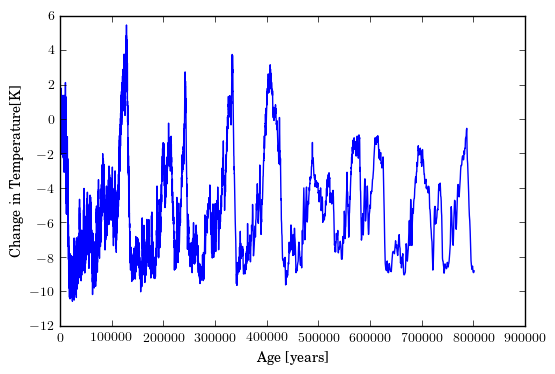

In [24]:

import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('text', usetex=True)
from datetime import datetime
ice_core = np.transpose(np.loadtxt('ice_core_data.txt'))
age = ice_core[2] #index this and the one below with the right columns
temp = ice_core[4]
plt.plot(age, temp)
plt.xlabel('Age [years]')
plt.ylabel('Change in Temperature[K]')
plt.show()



In this exercise, we are going to model the temperature fluctuations as 
$$ \Delta T = a_{1} sin(\frac{2 \pi x}{ p_{1}})+a_{2} sin(\frac{2 \pi x}{ p_{2}})+a_{3} sin(\frac{2 \pi x}{ p_{3}})+ T_{0} $$ 

where x would be your time. So here we have 7 free parameters that we can vary to determine a best fit for our data.
Below, I've given you a 'deltaT' function. It should take in the 7 free 
parameters (a1,a2,a3,p1,p2,p3, T0) as well as the time. You decide the order of the arguments. The stuff below the deltaT function sets up our initial parameter guesses. There are three processes that affect the Earth's temperature on three different timescales. These occur on timescales of 26000 , 41000 and 100000 years so we use those as our initial period guesses. These initial guesses are in par0,par1, and par2. We have to also include minimum and maximum values to limit the MCMC from investigating unrealistic or unallowed values. This is what these for loops are doing and pardict contains the limits for these values. Finally we add in the initial Temperature value T0.

In [16]:
def deltaT(-,-,-,-,-,-,-,-):
    '''This function calculates the value of delta T given all of 
    the parameters, where we are assuming that the periods and 
    amplitudes are associated with some real physical processes
    that occur periodically over geological time scales.
    '''#here you turn the above model into code and return the delta T

np.random.seed(0)
p = lmfit.Parameters()
pardict = {0:['a',0,5],1:['p',20000,150000] }
nthings =3
Ndim = 2*3+1
par0 = np.array([2.5,26000 ])
par1 = np.array([2.5, 41000])
par2 = np.array([2.5,100000])
for ind, pr in enumerate(par0):
        p.add(pardict[ind][0]+'0',pr,min = pardict[ind][1],max=pardict[ind][2])
for ind, pr in  enumerate(par1):
        p.add(pardict[ind][0]+'1',pr, min = pardict[ind][1],max=pardict[ind][2])
for ind, pr in enumerate(par2):
        p.add(pardict[ind][0]+'2',pr,min =pardict[ind][1],max=pardict[ind][2])
p.add('T0',T0,min = -6,max=0)



NameError: name 'ps4' is not defined

Now that we have our parameters and model function set up, we need a way to determine how far off our model is from the real data. I've gien you a residual function which converts our parameters into a more easily usable format.


In [ ]:
def residual(p):
    '''p are the parameters. We convert these into more easily usable
    formt with this for loop and then assign our free parameters 
    to variables. Below that, determine the model delta T and then 
    return the difference between the model and the real temperature
    values.
    '''
    prs = p.valuesdict()
    pars=[]
    for i,j in enumerate(prs):
        if i==Ndim:
                continue
        pars.append(prs[j])
    a1,p1,a2,p2,a3,p3,tzero = pars
    #your code here


When you have the above code ready to run, you should be able to finish up by running the code below.  It should take some time to run since this will actually run the MCMC on your model. The lnprob function essentially computes the likelihood of each configuration. I added some plotting commands at the end so you can see how good of a fit you got. Then try it again with more steps in the sampler to try to get a better fit, though this will take longer.


In [ ]:
#first provide some minimum guess as determined by some other method
mi = lmfit.minimize(residual,p, method='Nelder')
mi.params.add('f',value=0.0005, min=0.0001,max=0.001)

def lnprob(p):
        resid = residual(p)
        s=p['f']
        resid *=1/s
        resid *= resid
        resid += np.log(2*np.pi*s**2)
        return -0.5 *np.sum(resid)
mini = lmfit.Minimizer(lnprob,mi.params)

print(datetime.now().time(),'beginning')
###ACTUAL MCMC run
res=mini.emcee(burn=300, steps=450, thin =10, params=mi.params)
print(datetime.now().time(),'done')

def solpars(sampler):
        pars= []
        for i,j in enumerate(sampler.params.valuesdict()):
                if i ==Ndim:
                        continue
                val= sampler.params.valuesdict()[j]
                pars.append(val)
        return pars
#extract the solution parameters
a1,p1,a2,p2,a3,p3,Tzero = solpars(res)
#get the delta T!
delT = deltaT(age, a1,a2,a3,p1,p2,p3,Tzero)

plt.plot(age, delT,label='Model Temperature')
plt.plot(age,temp,label='Real Temperature')

plt.ylabel('Change in Temperature [K]')
plt.xlabel('Age [years]')
plt.show()
                                                 

## Scraping webpages in Python
With the urllib package, we can open and read HTML and similar files. With the Beautiful Soup package we can turn our HTML file into a much more readable and accessible product with information accessible through dot notation stored in methods and attributes. How exactly you use any of these depends on your goals/applications and there quite a few possibilities. You can combine these tools with selenium, a package that lets you control your webbrowser from python.

In [26]:
!pip install beautifulsoup4

In [28]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
url = 'https://en.wikipedia.org/wiki/Python_(programming_language)'
html =urlopen(url)
soup = BeautifulSoup(html.read())
print(soup.body.p.prettify())

/home/chris/anaconda3/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file /home/chris/anaconda3/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


<p>
 <b>
  Python
 </b>
 is a widely used
 <a href="/wiki/High-level_programming_language" title="High-level programming language">
  high-level programming language
 </a>
 for
 <a href="/wiki/General-purpose_programming_language" title="General-purpose programming language">
  general-purpose programming
 </a>
 , created by
 <a href="/wiki/Guido_van_Rossum" title="Guido van Rossum">
  Guido van Rossum
 </a>
 and first released in 1991. An
 <a href="/wiki/Interpreted_language" title="Interpreted language">
  interpreted language
 </a>
 , Python has a design philosophy which emphasizes code
 <a href="/wiki/Readability" title="Readability">
  readability
 </a>
 (notably using
 <a href="/wiki/Whitespace_character" title="Whitespace character">
  whitespace
 </a>
 indentation to delimit
 <a class="mw-redirect" href="/wiki/Code_block" title="Code block">
  code blocks
 </a>
 rather than curly braces or keywords), and a syntax which allows programmers to express concepts in fewer
 <a href="/

## Graphical User Interfaces
Because Python is such a widely used language, there have been many graphical user interface (GUI) packages written. They often basically have the same format where you create a window and then make labels, buttons, text entry boxes, lists, and whatever else you can think of. Some look far worse than others. I think Tkinter looks the tackiest but it's the most native to python so we'll use it today. Other good ones include PyQt, Kivy, PyGame, Pyglet, PySide, WxPython and many more.
Really you just pick one and go with it. Each one typically has its own syntax in terms of what things are called in each and how to call them but the general spirit is the same. These are generally things you probably won't need to memorize and there really isn't that much rhyme or reason to any of them. 
A GUI example is given below. None of the buttons except for the first two do anything but they could if you think of something for them to do!
##### Some More Resources 
http://effbot.org/tkinterbook/tkinter-index.htm#introduction

In [ ]:
from tkinter import *
import tkinter
main = tkinter.Tk()

def set_some_values():
    global some_values
    values = e1.get().split(',')
    some_values= []
    Label(main,text = values).grid(row=2,column=3)

    for i in values:
        if 'pi' in  i:
            i=eval(i.replace('pi',str(np.pi)))
            some_values.append(i)
        else:
            some_values.append(float(i)*np.pi/180)


def set_other_values():
    global other_values
    other_values = []
    values = e2.get().split(',')
    Label(main,text = values).grid(row=3,column=3)
    for i in values:
        if 'pi' in i:
            i=eval(i.replace('pi',str(np.pi)))
            other_values.append(i)
        else:
            other_values.append(float(i)*np.pi/180)

Label(main,text = 'GUI Example Program').grid(row=0,column=2)
Label(main,text="Enter Some Values separated by commas").grid(row=1,column=2)
Label(main, text="Some Values ").grid(row=2,column=1)
Label(main, text="Other Values").grid(row=3,column=1)

e1 = Entry(main)
e2 = Entry(main)
e3 = Entry(main)

e1.grid(row=2, column=2)
e2.grid(row=3, column=2)

Button(main,text='Set Some Values',command = set_some_values).grid(row=4,column=2,pady=4)
Button(main,text='Set Other Values',command = set_other_values).grid(row=5,column=2,pady=4)
Button(main, text='Select Image 1', command=None).grid(row=6, column=1, pady=4)
Button(main, text='Select Image 2', command=None).grid(row=6, column=2, pady=4)
Button(main, text='Select Image 3', command=None).grid(row=6, column=3,pady =4)
Label(main,text = 'Filenames:').grid(row=7,column=2,pady=4)
var = StringVar(main)
var.set("Option 1")

option =OptionMenu(main,var,'Option 1','Option 2', 'Option 3','Option 4','Option 5')
option.grid(row=10,column = 2,pady=4)
menu = option.children["menu"]
Button(main,text = 'Analyze Choice', command = None).grid(row=11,column=2,pady=4)
Label(main,text= 'Output File Name').grid(row=12,column=1,pady=4)
Button(main,text = 'Save Configuration', command = None).grid(row=14,column=3,pady=4)
Button(main,text= ' Load Configuration', command = None).grid(row=14,column=1,pady=4)
Button(main,text='Reset Everything',command = None).grid(row=14,column=2,pady=4)

main.wm_title('GUI Example Program')



main.mainloop()


### Final Exercise: Add a GUI to your solar system program
Create a GUI so that a user can add bodies of arbitrary massses at various positions. Add something that allows the user to select how much of a timestep to take and how many steps the simulation should take. The end result should still be a plot of the events that took place.
Good luck!

In [ ]:
# your solar system simulator code here


# your solar system simulator GUI here

## Congratulations you have now finished the Advanced Python Bootcamp!